In [19]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'v1_3'

base_folder = f'../../data/manager/simulate_rule/{run}'

folder = os.path.join(base_folder, 'train')
merged_folder = os.path.join(base_folder, 'merged')

plot_folder = f'plots/{run}'

make_dir(plot_folder)
make_dir(merged_folder)

id_vars = ['s', 'c', 'round_number', 'agent']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$pun = (20-cont) \cdot s + cont? \cdot  c - b$

In [20]:
def _plot_heatmap(data, x, y, values, normalise=True):
    dfg = data.groupby([x,y])[values].sum()
    dfg = dfg.reset_index()
    if normalise:
        dfg[values] = dfg[values] / dfg.groupby([x])[values].transform('sum')
    cm = dfg.pivot_table(index=x, columns=y, values=values)
    cm = cm.sort_index(ascending=False)
    sns.heatmap(cm)

In [21]:
file_names = ['trace.csv']


def get_df(file_name, merged_folder, folder):
    m_file = os.path.join(merged_folder, file_name)
    if not os.path.isfile(m_file):
        df = merge_files_by_name(folder, file_name)
        df.to_parquet(m_file)
        return df
    else:
        return pd.read_parquet(m_file)

sim_df = get_df('trace.csv', merged_folder, folder)


In [22]:


sim_df = sim_df.sort_values(id_vars)

df_melt = pd.melt(sim_df, id_vars=id_vars, value_vars=['punishments', 'common_good', 'contributions'], var_name='metric', value_name='value')

sim_df.head()

,Unnamed: 0,c,s,round_number,agent,punishments,common_good,contributions,payoffs
0,0,0.0,0.0,0,0,0.0,79.4656,12.757,0.000000
1,1,0.0,0.0,0,1,0.0,79.4656,12.530,0.000000
2,2,0.0,0.0,0,2,0.0,79.4656,12.260,0.000000
3,3,0.0,0.0,0,3,0.0,79.4656,12.119,0.000000
4,4,0.0,0.0,1,0,0.0,77.8896,12.339,19.742401


<AxesSubplot:xlabel='s', ylabel='value'>

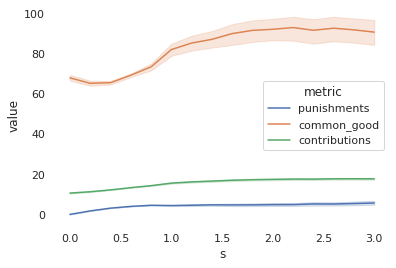

In [24]:
ref = {'s': 3.0, 'c': 0.0}

focus = 's'

df = df_melt.copy()

selection = {k: v for k, v in ref.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

df = df[w]

sns.lineplot(data=df, x=focus, y='value', hue='metric')

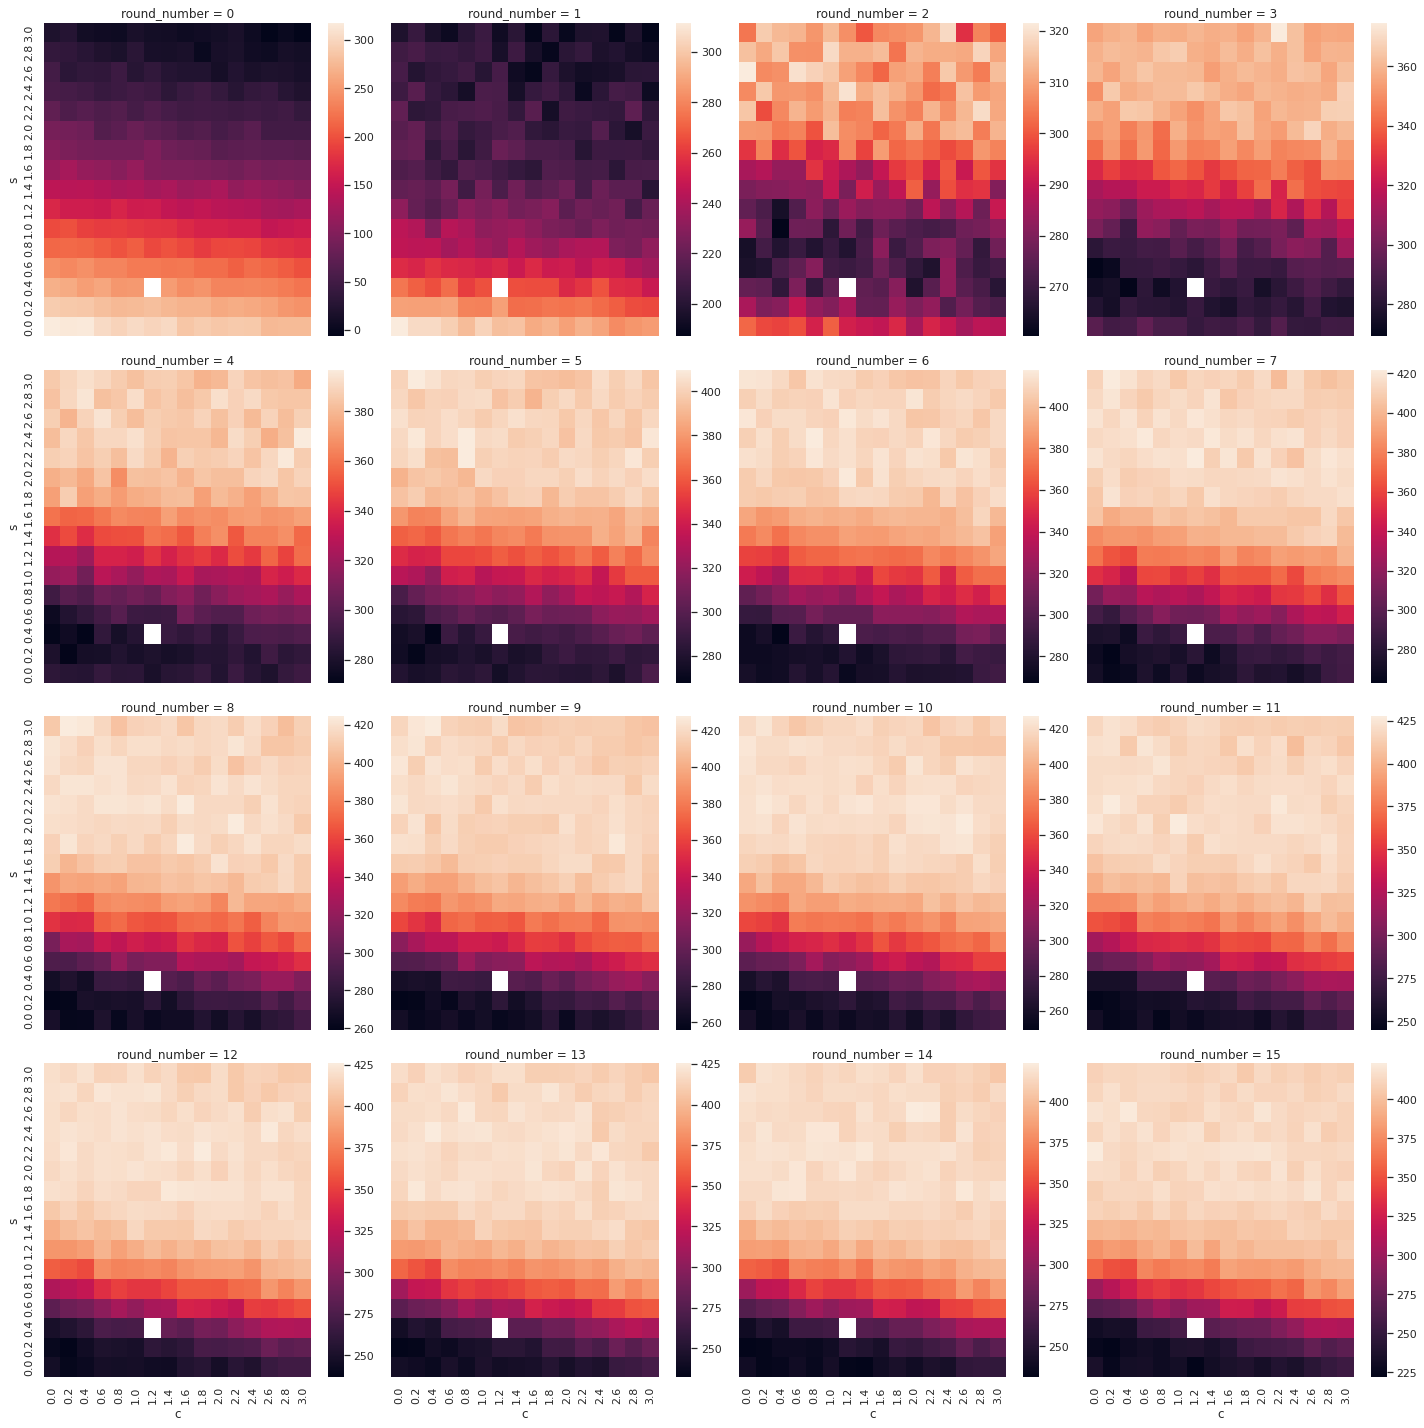

In [25]:
df = sim_df.copy()

plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='c', values='common_good', normalise=False)

fg = sns.FacetGrid(
    df, col='round_number',
    col_wrap=4,
    height=5)
fg.map_dataframe(plot_heatmap)

In [29]:
id_vars

['s', 'c', 'round_number', 'agent']

In [47]:
df = df_melt.copy()

df = df.groupby(id_vars[:-1]+['metric'])['value'].mean().reset_index()

df['cumsum'] = df.groupby(id_vars[:-2]+['metric'])['value'].cumsum()
df['cumcount'] = df.groupby(id_vars[:-2]+['metric'])['value'].cumcount() + 1
df['cummean'] = df['cumsum'] / df['cumcount']
# df = df.groupby(id_vars[:-2]+['metric'])['value'].cumcount().reset_index()
df_melt2 = df

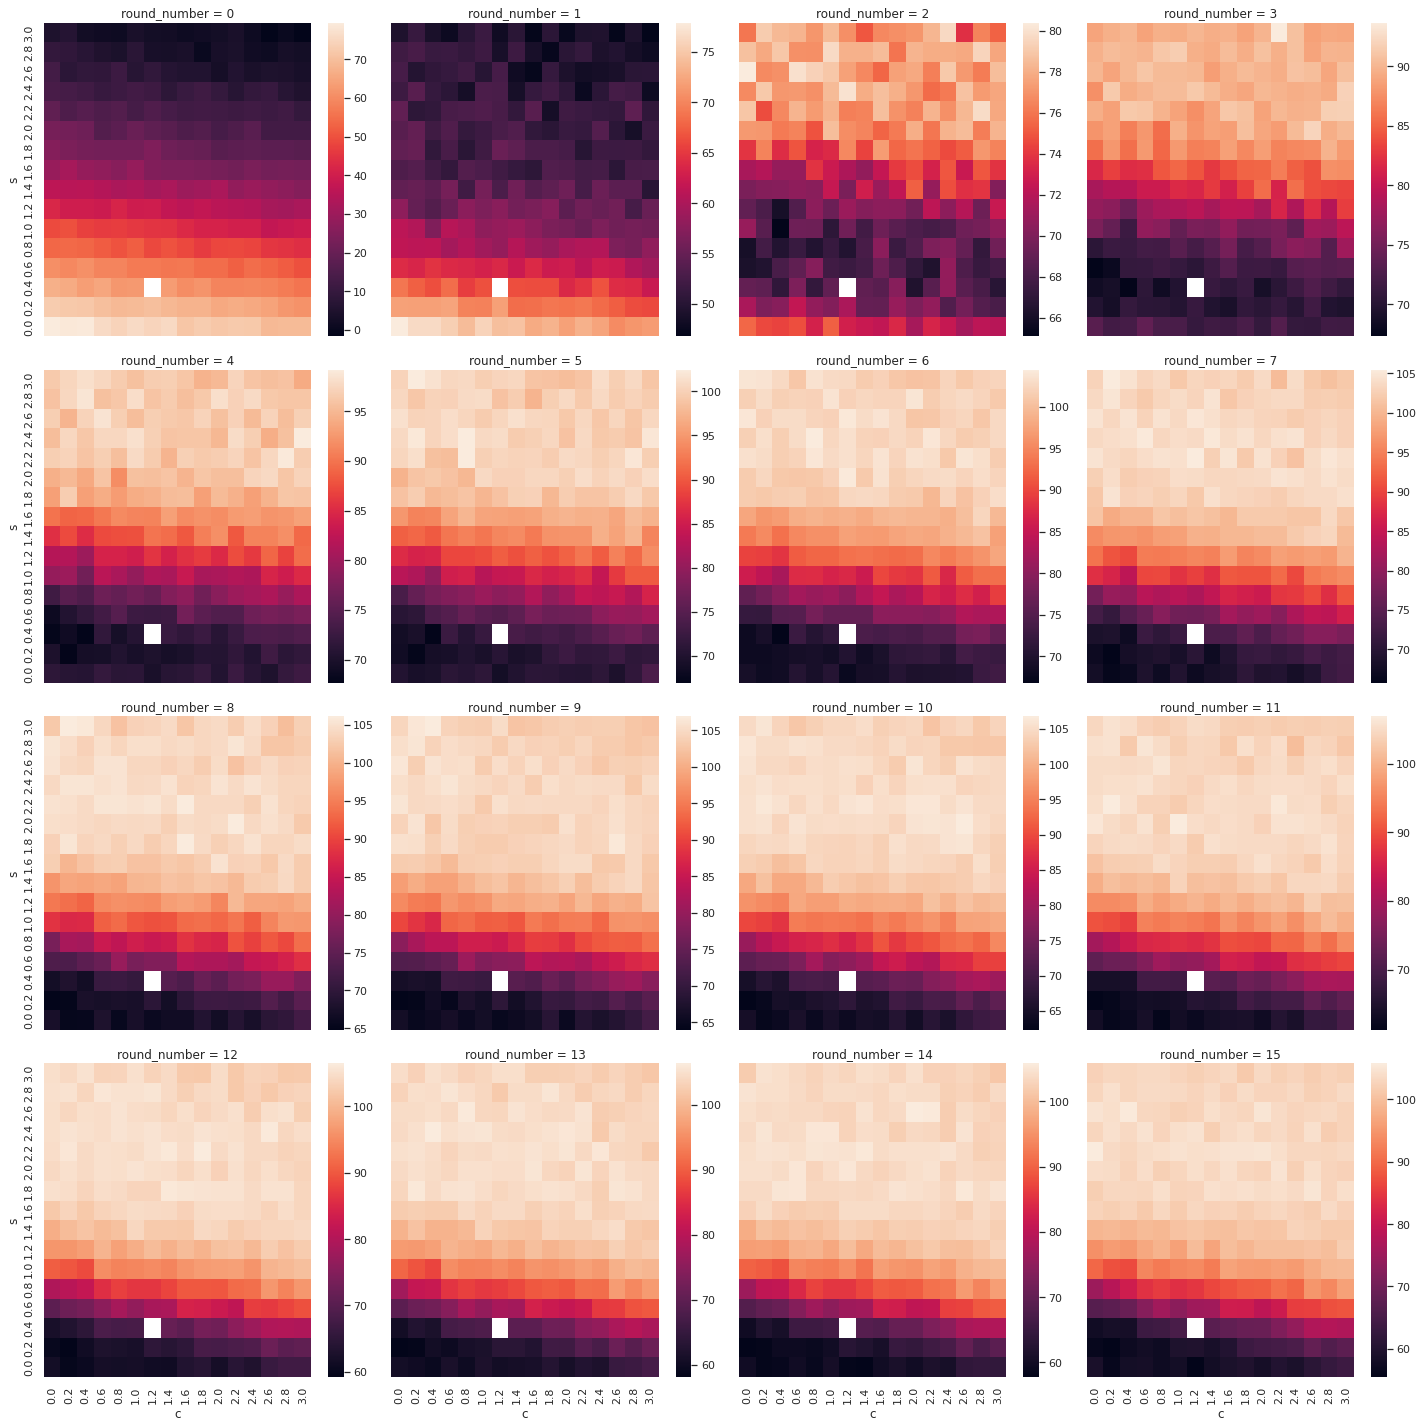

In [51]:
df = df_melt2.copy()

df = df[df['metric'] == 'common_good']

plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='c', values='value', normalise=False)

fg = sns.FacetGrid(
    df, col='round_number',
    col_wrap=4,
    height=5)
fg.map_dataframe(plot_heatmap)

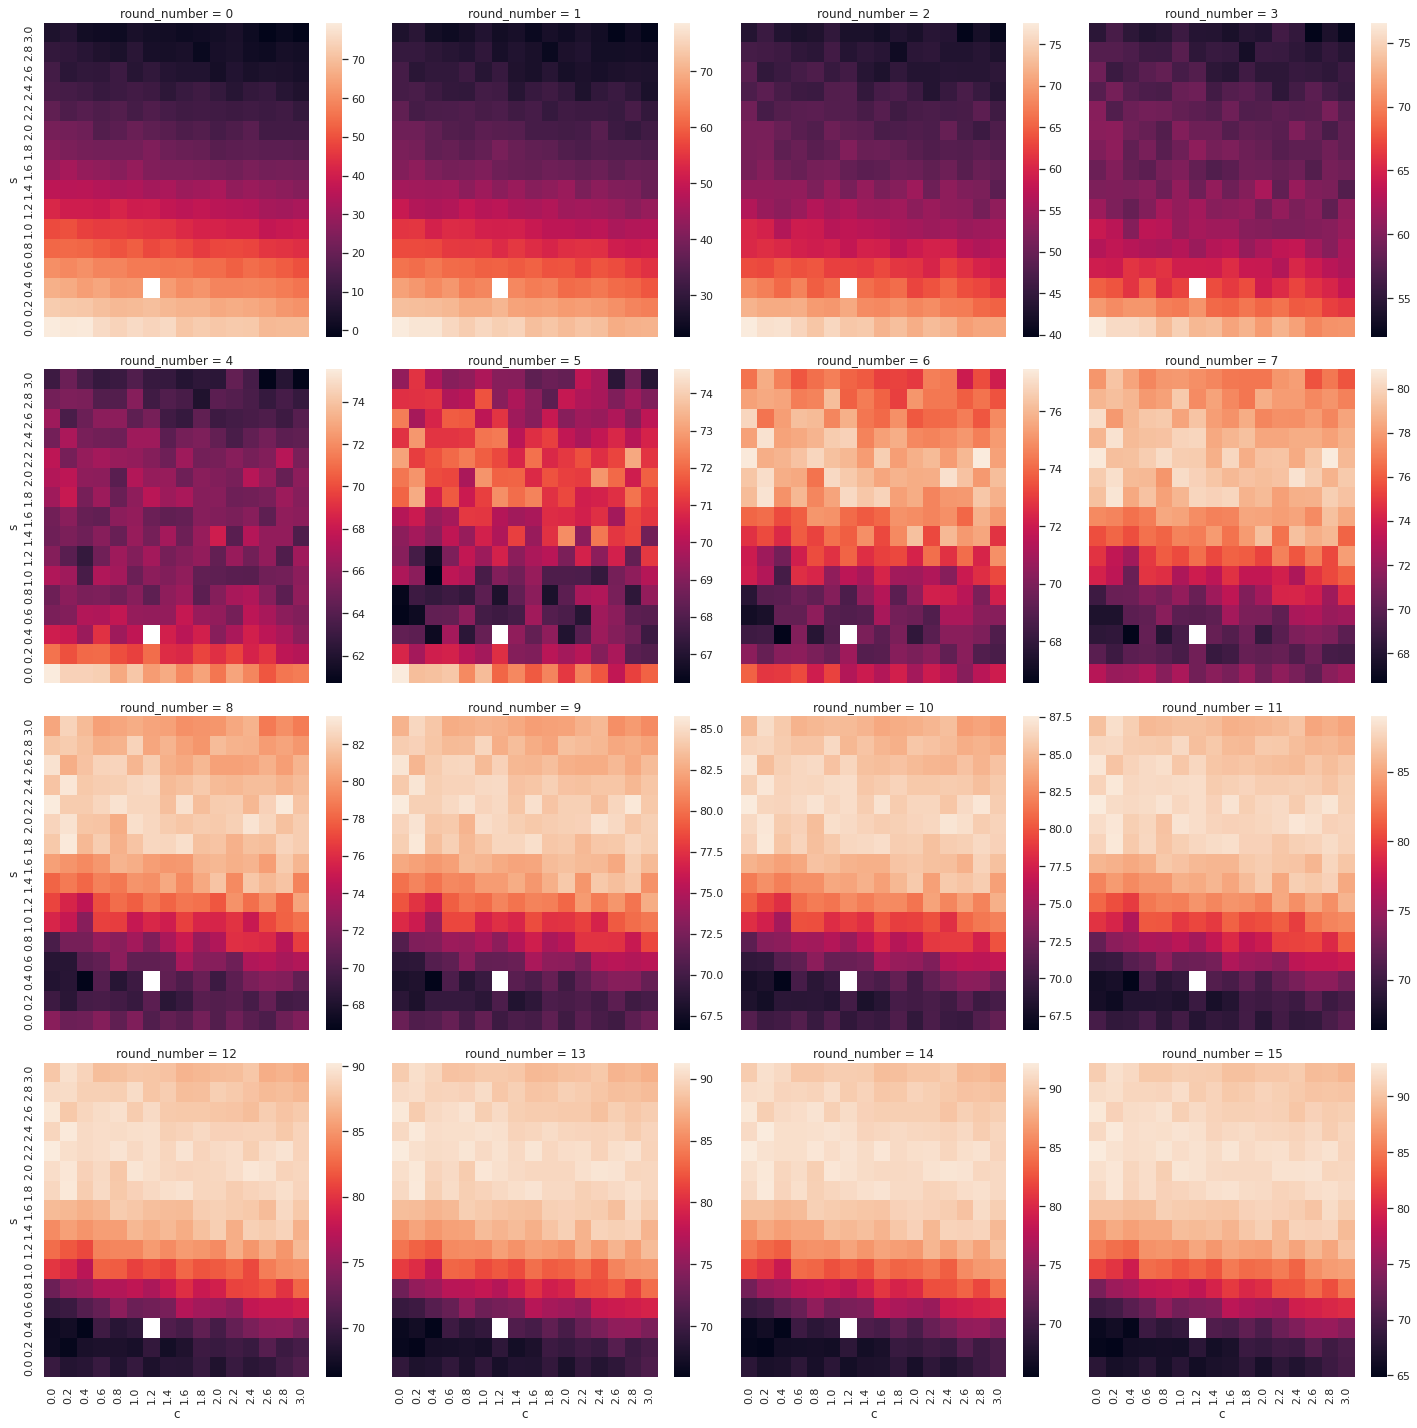

In [52]:
df = df_melt2.copy()

df = df[df['metric'] == 'common_good']

plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='c', values='cummean', normalise=False)

fg = sns.FacetGrid(
    df, col='round_number',
    col_wrap=4,
    height=5)
fg.map_dataframe(plot_heatmap)

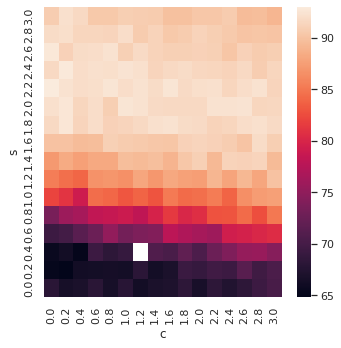

In [53]:
df = sim_df.copy()


id_vars

df = sim_df.groupby(id_vars[:-2]).mean().reset_index()

plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='c', values='common_good', normalise=False)

fg = sns.FacetGrid(
    df,
    height=5)
fg.map_dataframe(plot_heatmap)